#  Attack or Normal Response

This notebook will implement several machine learning methods:

- Logistic Regression
- Decision Trees
- Random Forest
- Neural Networks: we will use Multi-layer perceptron.

We decided to work on a project with pertinent implications in today’s world. Our project is titled “Malicious Activity and Intrusion Detection in Cyber Security Systems using Machine Learning”.   
Our work involves a post-mortem analysis of cyber-attacks that have taken place, which in turn may  help greatly improve cybersecurity mitigation infrastructure of such attacks in real-time. Succinctly, our model performs the following two tasks:

a.	Classifies whether a transactional data is an attack or not'  
b.	If it is an attack, then, which attack class, does it belong to.  
Our model has been trained to distinguish between 9 different attack categories, which will be talked about below.

# Libraries

Import libararies to implement the described machine learning methods using a few different `sklearn` algorithms.

In [152]:
# data cleaning and plots
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# sklearn: data preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

# sklearn: train model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, classification_report

# sklearn classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Data Processing

## Load Data

The dataset that we used for our project is a dataset on intrusion detection systems called UNSW-NB15 created by University of New South Wales at the Australian Defence Force Academy. This dataset has a hybrid of real modern normal and contemporary synthesised attack activities of the network traffic.
This dataset has nine types of attacks, namely, Fuzzers, Analysis, Backdoors, DoS, Exploits, Generic, Reconnaissance, Shellcode and Worms.   
The total number of records in the dataset is 257,673.  
The original dataset contained 45 features including the two target labels, ‘attack_cat’ and ‘label’. 

During data pre-processing, we have dropped 4 features: ‘id’, ‘proto’, ‘service’, ‘state’. After this step, we have a total of features for the model to learn on.  After pre-processing, none of the independent variables are categorical in nature. 



attack_cat: This dataset has types of attacks, namely, Fuzzers, Analysis, Backdoors, DoS, Exploits, Generic, Reconnaissance, Shellcode and Worms.

Label: 0 for normal and 1 for attack records



In [61]:
from google.colab import files
uploaded = files.upload()

Saving UNSW_NB15_testing-set.csv to UNSW_NB15_testing-set (2).csv
Saving UNSW_NB15_training-set.csv to UNSW_NB15_training-set (2).csv


In [98]:

data = pd.read_csv('UNSW_NB15_training-set.csv')

In [99]:

data.head(n=10)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,Normal,0
5,6,0.380537,tcp,-,FIN,10,6,534,268,39.417980,254,252,10112.025390,4709.134766,2,1,39.928778,52.241000,2223.730342,82.550500,255,3984155503,1796040391,255,0.172934,0.119331,0.053603,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,Normal,0
6,7,0.637109,tcp,-,FIN,10,8,534,354,26.683033,254,252,6039.783203,3892.583740,2,1,68.267778,81.137711,4286.828570,119.422719,255,1787309226,1767180493,255,0.143337,0.069136,0.074201,53,44,0,0,43,1,1,1,1,40,0,0,0,1,39,0,Normal,0
7,8,0.521584,tcp,-,FIN,10,8,534,354,32.593026,254,252,7377.527344,4754.747070,2,1,55.794000,66.054141,3770.580726,118.962633,255,205985702,316006300,255,0.116615,0.059195,0.057420,53,44,0,0,43,1,3,3,1,40,0,0,0,3,39,0,Normal,0
8,9,0.542905,tcp,-,FIN,10,8,534,354,31.313031,254,252,7087.796387,4568.018555,2,1,60.210889,68.109000,4060.625597,106.611547,255,884094874,3410317203,255,0.118584,0.066133,0.052451,53,44,0,0,43,1,3,3,1,40,0,0,0,3,39,0,Normal,0
9,10,0.258687,tcp,-,FIN,10,6,534,268,57.985135,254,252,14875.120120,6927.291016,2,1,27.505111,39.106801,1413.686415,57.200395,255,3368447996,584859215,255,0.087934,0.063116,0.024818,53,45,0,0,43,1,3,3,1,40,0,0,0,3,39,0,Normal,0


In [100]:
# information of the data: 583 data points, 10 features' columns and 1 target column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

## Tidy Data

### Check missing values
First, we should check if there are missing values in the dataset. We could see that four patients do not have the value of `Albumin_and_Globulin_Ratio`.

In [101]:
# check if there are Null values
data.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [102]:
# Discard the rows with missing values
data1 = data.dropna()

# Shape of the data: we could see that the number of rows remains the same as no null values were reported
data1.shape

(175341, 45)

### Check imbalanced issue on y

First, we get the `X` and `y1` and `y2` .

In [103]:
X = data1.drop(axis=1, columns=['attack_cat']) # X is a dataframe
X = X.drop(axis=1, columns=['label'])

y1 = data1['attack_cat'].values # y is an array
y2 = data1['label'].values

In [104]:
X = data1.drop(axis=1, columns=['attack_cat']) # X is a dataframe
X = X.drop(axis=1, columns=['label'])

y1 = data1['attack_cat'].values # y is an array
y2 = data1['label'].values

We could see that the dataset is not perfectly balanced. There are some sampling techniques to deal with this issue. Here, we ignore this issue because we are aimed to implement several ML models to compare their performance. 

The dataset has been split in a ratio of 70:30. The number of records in the training set is 175,341 records and the testing set is 82,332 records. 

In [105]:
test_data = pd.read_csv('UNSW_NB15_testing-set.csv')
X_test = test_data.drop(axis=1, columns=['attack_cat']) # X_test is a dataframe
X_test = X_test.drop(axis=1, columns=['label'])


y1_test = test_data['attack_cat'].values # y is an array
y2_test = test_data['label'].values
X_train = X
y1_train = y1
y2_train = y2

### Transform training and testing data

#### Transformation on X_train, X_test

Using StandardScaler() we have scaled the numerical values in the independent labels.  Next, we encode the target variable ‘attack_cat’. Since we have 10 categories (including ‘Normal’) in our target variable, we used Label Encoder to encode these categories. LabelEncoder is a utility class to help normalize labels such that they contain only values between 0 and number_of_classes-1. 

In [108]:
# determine categorical and numerical columns
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns
numerical_columns=numerical_columns.drop('id')
categorical_columns = X_train.select_dtypes(include=['object', 'bool']).columns

In [109]:
numerical_columns

Index(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl',
       'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit',
       'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean',
       'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports'],
      dtype='object')

In [110]:
categorical_columns

Index(['proto', 'service', 'state'], dtype='object')

Then, we construct the `ColumnTransformer` object, and then fit it on training data.

In [111]:
# define the transformation methods for the columns
t = [('scale', StandardScaler(), numerical_columns)]

col_trans = ColumnTransformer(transformers=t)

# fit the transformation on training data
col_trans.fit(X_train)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('scale',
                                 StandardScaler(copy=True, with_mean=True,
                                                with_std=True),
                                 Index(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl',
       'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit',
       'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean',
       'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports'],
      dtype='object'))],
                  verbose=False)

In [112]:
X_train_trans = col_trans.transform(X_train)

In [113]:
# apply transformation to both training and testing data 
# fit the transformation on training data

In [114]:
X_test_trans = col_trans.transform(X_test)

We could look at the transformed training data. It becomes an array-like structure rather than a dataframe structure.

In [115]:
# look at the transformed training data
X_train_trans.shape

(175341, 39)

In [116]:
X_test_trans.shape

(82332, 39)

In [117]:
# Note that the distinct values/labels in `y2` target are 1 and 2. 
pd.unique(y1)

array(['Normal', 'Backdoor', 'Analysis', 'Fuzzers', 'Shellcode',
       'Reconnaissance', 'Exploits', 'DoS', 'Worms', 'Generic'],
      dtype=object)

In [118]:
pd.unique(y2)

array([0, 1])

#### Transformation on y_train and y_test

`LabelEncoder` is a utility class to help normalize labels such that they contain only values between 0 and n_classes-1. Note that the distinct values/labels in `label` target are  attak(0) and not attack(1) .  we provide the `LabelEncoder` transformation which is a standard way of dealing with targeted values. Again, similar to the transformation on `X`, we will apply `fit` method to `y_train` and then apply `transform` method to both `y_train` and `y_test`.  

In [119]:
# Define a LabelEncoder() transformation method and fit on y1_train
target_trans = LabelEncoder()
target_trans.fit(y1_train)

LabelEncoder()

In [120]:
# apply transformation method on y1_train and y1_test
y1_train_trans = target_trans.transform(y1_train)
y1_test_trans = target_trans.transform(y1_test)

In [121]:
# view the transformed y1_train
y1_train_trans

array([6, 6, 6, ..., 5, 5, 5])

In [122]:
# Define a LabelEncoder() transformation method and fit on y2_train
target_trans = LabelEncoder()
target_trans.fit(y2_train)
y2_train_trans = target_trans.transform(y2_train)
y2_test_trans = target_trans.transform(y2_test)

In [123]:
# view the transformed y2_train
y2_train_trans

array([0, 0, 0, ..., 1, 1, 1])

# Train ML Models

We will train several machine learning models for the training set and evaluate their performance on both training and testing set. Before doing this, let's first go through a standard procedure of training a certain classifier.




For Logistic Regression, we set the maximum iterations as 5000 as it ensured convergence.   
For the MLP, we set the maximum iterations as 8000 as we were not getting convergence with 5000 iterations. We have used a learning rate of 0.0001. For the MLP classifier, we have used a ReLU activation function. Also from hw-3, we observed that using using Nesterov enabled the training are not as erratic. Using Nesterov seemed like the most stable approach and hence it has been enabled with Adam. Nesterov momentum is generally used with SGD, but it can be used with ADAM by replacing the previous momentum vector with the current momentum vector. 

## Several ML Models


We will implement several ML models through the above steps.  

The followings are ML models functions: 

- `LogisticRegression()`
- `DecisionTreeClassifier()`
- `RandomForestClassifier()`
- `MLPClassifier()`



In [125]:
# Define four models
models = [('LogisticRegression', LogisticRegression(random_state=123, max_iter=5000)),
          ('Decision Tree', DecisionTreeClassifier(random_state=123)),
          ('RandomForest', RandomForestClassifier(random_state=123)),
          ('MultiLayerPerceptron', MLPClassifier(random_state=123, solver='adam', max_iter=8000))
         ]

We could check the hyperparameters values in these models: 

In [126]:
for model_name, clf in models:
    print(clf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity

In [145]:
# define several lists and dataframe to store the CV results and evaluation results on testing data
model_names = []
cv_fit_time = []
cv_accuracy = []
cv_precision = []
cv_recall = []
cv_f1 = []
cv_roc_auc = []

test_accuracy = []
test_precision = []
test_recall = []
test_f1 = []
test_roc_auc = []

roc_curve_df = pd.DataFrame()
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

**Finally, we write the code to perform the above four ML models and store their cross-validation results and evaluation results on testing data.**

In [146]:
clf=models[0][1]
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)



    
# perform the 5-fold CV and get the metrics results
cv_results = cross_validate(estimator=clf,
                            X=X_train_trans,
                            y=y2_train_trans,
                            scoring=scoring,
                            cv=cv,
                            return_train_score=False)  # prevent to show the train scores on cv splits.

# calculate the mean values of those scores
cv_fit_time_mean = cv_results['fit_time'].mean()
cv_accuracy_mean = cv_results['test_accuracy'].mean()
cv_precision_mean = cv_results['test_precision'].mean()
cv_recall_mean = cv_results['test_recall'].mean()
cv_f1_mean = cv_results['test_f1'].mean()
cv_roc_auc_mean = cv_results['test_roc_auc'].mean()

# store CV results into those lists
model_names.append(models[0][0])
cv_fit_time.append(cv_fit_time_mean)
cv_accuracy.append(cv_accuracy_mean)
cv_precision.append(cv_precision_mean)
cv_recall.append(cv_recall_mean)
cv_f1.append(cv_f1_mean)
cv_roc_auc.append(cv_roc_auc_mean)

# ==== Step 2: Evaluation on Testing data =====

# fit model
clf.fit(X=X_train_trans, y=y2_train_trans)

# predition on testing data

# predicted label or class
y_pred_class = clf.predict(X=X_test_trans)  

# predicted probability of the label 1
y_pred_score = clf.predict_proba(X=X_test_trans)[:, 1]

# accuracy
accuracy_ontest = accuracy_score(y_true=y2_test_trans, y_pred=y_pred_class)

# auc of ROC
auc_ontest = roc_auc_score(y_true=y2_test_trans, y_score=y_pred_score)

# precision score
precision_ontest = precision_score(y_true=y2_test_trans, y_pred=y_pred_class)

# recall score
recall_ontest = recall_score(y_true=y2_test_trans, y_pred=y_pred_class)

# F1 score
f1_ontest = f1_score(y_true=y2_test_trans, y_pred=y_pred_class)

# roc curve dataframe


In [153]:
roc_curve_df = pd.DataFrame()
fpr, tpr, threshold_roc = roc_curve(y_true=y2_test_trans, y_score=y_pred_score)

In [154]:
#fpr, tpr, threshold_roc = roc_curve(y_true=y2_test_trans, y_score=y_pred_score)

roc_df = pd.DataFrame(list(zip(fpr, tpr, threshold_roc)),
                      columns=['False Positive Rate', 'True Positive Rate', 'Threshold'])

roc_df['Model'] = '{} (AUC = {:.3f})'.format(models[0][0], auc_ontest)


# store the above values
test_accuracy.append(accuracy_ontest)
test_roc_auc.append(auc_ontest)
test_precision.append(precision_ontest)
test_recall.append(recall_ontest)
test_f1.append(f1_ontest)

roc_curve_df = pd.concat([roc_curve_df, roc_df],
                              ignore_index=True)

In [155]:
clf=models[1][1]
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)



    
# perform the 5-fold CV and get the metrics results
cv_results = cross_validate(estimator=clf,
                            X=X_train_trans,
                            y=y2_train_trans,
                            scoring=scoring,
                            cv=cv,
                            return_train_score=False)  # prevent to show the train scores on cv splits.

# calculate the mean values of those scores
cv_fit_time_mean = cv_results['fit_time'].mean()
cv_accuracy_mean = cv_results['test_accuracy'].mean()
cv_precision_mean = cv_results['test_precision'].mean()
cv_recall_mean = cv_results['test_recall'].mean()
cv_f1_mean = cv_results['test_f1'].mean()
cv_roc_auc_mean = cv_results['test_roc_auc'].mean()

# store CV results into those lists
model_names.append(models[0][0])
cv_fit_time.append(cv_fit_time_mean)
cv_accuracy.append(cv_accuracy_mean)
cv_precision.append(cv_precision_mean)
cv_recall.append(cv_recall_mean)
cv_f1.append(cv_f1_mean)
cv_roc_auc.append(cv_roc_auc_mean)

# ==== Step 2: Evaluation on Testing data =====

# fit model
clf.fit(X=X_train_trans, y=y2_train_trans)

# predition on testing data

# predicted label or class
y_pred_class = clf.predict(X=X_test_trans)  

# predicted probability of the label 1
y_pred_score = clf.predict_proba(X=X_test_trans)[:, 1]

# accuracy
accuracy_ontest = accuracy_score(y_true=y2_test_trans, y_pred=y_pred_class)

# auc of ROC
auc_ontest = roc_auc_score(y_true=y2_test_trans, y_score=y_pred_score)

# precision score
precision_ontest = precision_score(y_true=y2_test_trans, y_pred=y_pred_class)

# recall score
recall_ontest = recall_score(y_true=y2_test_trans, y_pred=y_pred_class)

# F1 score
f1_ontest = f1_score(y_true=y2_test_trans, y_pred=y_pred_class)

# roc curve dataframe


In [156]:
fpr, tpr, threshold_roc = roc_curve(y_true=y2_test_trans, y_score=y_pred_score)

roc_df = pd.DataFrame(list(zip(fpr, tpr, threshold_roc)),
                      columns=['False Positive Rate', 'True Positive Rate', 'Threshold'])

roc_df['Model'] = '{} (AUC = {:.3f})'.format(models[1][1], auc_ontest)


# store the above values
test_accuracy.append(accuracy_ontest)
test_roc_auc.append(auc_ontest)
test_precision.append(precision_ontest)
test_recall.append(recall_ontest)
test_f1.append(f1_ontest)

roc_curve_df = pd.concat([roc_curve_df, roc_df],
                              ignore_index=True)

In [157]:
clf=models[2][1]
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)



    
# perform the 5-fold CV and get the metrics results
cv_results = cross_validate(estimator=clf,
                            X=X_train_trans,
                            y=y2_train_trans,
                            scoring=scoring,
                            cv=cv,
                            return_train_score=False)  # prevent to show the train scores on cv splits.

# calculate the mean values of those scores
cv_fit_time_mean = cv_results['fit_time'].mean()
cv_accuracy_mean = cv_results['test_accuracy'].mean()
cv_precision_mean = cv_results['test_precision'].mean()
cv_recall_mean = cv_results['test_recall'].mean()
cv_f1_mean = cv_results['test_f1'].mean()
cv_roc_auc_mean = cv_results['test_roc_auc'].mean()

# store CV results into those lists
model_names.append(models[2][0])
cv_fit_time.append(cv_fit_time_mean)
cv_accuracy.append(cv_accuracy_mean)
cv_precision.append(cv_precision_mean)
cv_recall.append(cv_recall_mean)
cv_f1.append(cv_f1_mean)
cv_roc_auc.append(cv_roc_auc_mean)

# ==== Step 2: Evaluation on Testing data =====

# fit model
clf.fit(X=X_train_trans, y=y2_train_trans)

# predition on testing data

# predicted label or class
y_pred_class = clf.predict(X=X_test_trans)  

# predicted probability of the label 1
y_pred_score = clf.predict_proba(X=X_test_trans)[:, 1]

# accuracy
accuracy_ontest = accuracy_score(y_true=y2_test_trans, y_pred=y_pred_class)

# auc of ROC
auc_ontest = roc_auc_score(y_true=y2_test_trans, y_score=y_pred_score)

# precision score
precision_ontest = precision_score(y_true=y2_test_trans, y_pred=y_pred_class)

# recall score
recall_ontest = recall_score(y_true=y2_test_trans, y_pred=y_pred_class)

# F1 score
f1_ontest = f1_score(y_true=y2_test_trans, y_pred=y_pred_class)

# roc curve dataframe


In [158]:
fpr, tpr, threshold_roc = roc_curve(y_true=y2_test_trans, y_score=y_pred_score)

roc_df = pd.DataFrame(list(zip(fpr, tpr, threshold_roc)),
                      columns=['False Positive Rate', 'True Positive Rate', 'Threshold'])

roc_df['Model'] = '{} (AUC = {:.3f})'.format(models[2][0], auc_ontest)


# store the above values
test_accuracy.append(accuracy_ontest)
test_roc_auc.append(auc_ontest)
test_precision.append(precision_ontest)
test_recall.append(recall_ontest)
test_f1.append(f1_ontest)

roc_curve_df = pd.concat([roc_curve_df, roc_df],
                              ignore_index=True)

In [159]:
clf=models[3][1]
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)



    
# perform the 5-fold CV and get the metrics results
cv_results = cross_validate(estimator=clf,
                            X=X_train_trans,
                            y=y2_train_trans,
                            scoring=scoring,
                            cv=cv,
                            return_train_score=False)  # prevent to show the train scores on cv splits.

# calculate the mean values of those scores
cv_fit_time_mean = cv_results['fit_time'].mean()
cv_accuracy_mean = cv_results['test_accuracy'].mean()
cv_precision_mean = cv_results['test_precision'].mean()
cv_recall_mean = cv_results['test_recall'].mean()
cv_f1_mean = cv_results['test_f1'].mean()
cv_roc_auc_mean = cv_results['test_roc_auc'].mean()

# store CV results into those lists
model_names.append(models[3][0])
cv_fit_time.append(cv_fit_time_mean)
cv_accuracy.append(cv_accuracy_mean)
cv_precision.append(cv_precision_mean)
cv_recall.append(cv_recall_mean)
cv_f1.append(cv_f1_mean)
cv_roc_auc.append(cv_roc_auc_mean)

# ==== Step 2: Evaluation on Testing data =====

# fit model
clf.fit(X=X_train_trans, y=y2_train_trans)

# predition on testing data

# predicted label or class
y_pred_class = clf.predict(X=X_test_trans)  

# predicted probability of the label 1
y_pred_score = clf.predict_proba(X=X_test_trans)[:, 1]

# accuracy
accuracy_ontest = accuracy_score(y_true=y2_test_trans, y_pred=y_pred_class)

# auc of ROC
auc_ontest = roc_auc_score(y_true=y2_test_trans, y_score=y_pred_score)

# precision score
precision_ontest = precision_score(y_true=y2_test_trans, y_pred=y_pred_class)

# recall score
recall_ontest = recall_score(y_true=y2_test_trans, y_pred=y_pred_class)

# F1 score
f1_ontest = f1_score(y_true=y2_test_trans, y_pred=y_pred_class)

# roc curve dataframe


In [160]:
fpr, tpr, threshold_roc = roc_curve(y_true=y2_test_trans, y_score=y_pred_score)

roc_df = pd.DataFrame(list(zip(fpr, tpr, threshold_roc)),
                      columns=['False Positive Rate', 'True Positive Rate', 'Threshold'])

roc_df['Model'] = '{} (AUC = {:.3f})'.format(models[3][0], auc_ontest)


# store the above values
test_accuracy.append(accuracy_ontest)
test_roc_auc.append(auc_ontest)
test_precision.append(precision_ontest)
test_recall.append(recall_ontest)
test_f1.append(f1_ontest)

roc_curve_df = pd.concat([roc_curve_df, roc_df],
                              ignore_index=True)

### Model Comparison
The CV results will show how good the model has been trained by using the training data given a set of hyperparameters in the ML model. The metrics of evaluating a model include accuracy, precision, recall, F1 score, AUC value of ROC.

For the metric selection we initially considered ‘recall’ for the model comparison as type-2 errors are costly in our domain of cybersecurity. However, if we consider the response towards every false alarm to a normal transactional data as a non-economical affair, we need to incorporate type-1 error as well. So, we sorted our model performance in the given table based on the F-1 score as it is the harmonic mean between the precision and recall, where it’s value swings towards lesser value as compared to Arithmetic Mean and thus helps us to make a better decision about the model without inflating the matrix. Basically, an F1 score reaches its best value at 1 and worst score at 0.

In [188]:
results = {'Model Name': ["Logistic Regression","Decision Tree","Random Forest","MP Classifier"],
                'CV Fit Time': cv_fit_time,
                'CV Accuracy mean': cv_accuracy,
                'CV Precision mean': cv_precision,
                'CV Recall mean': cv_recall,
                'CV F1 mean': cv_f1,
                'CV AUC mean': cv_roc_auc,
                'Test Accuracy': test_accuracy,
                'Test Precision': test_precision,
                'Test Recall': test_recall,
                'Test F1': test_f1,
                'Test AUC': test_roc_auc
                }

results = pd.DataFrame(results)

# sort the results according to F1 score on testing data
#results.sort_values(by='Test F2', ascending=False)

In [164]:
results

,Model Name,CV Fit Time,CV Accuracy mean,CV Precision mean,CV Recall mean,CV F1 mean,CV AUC mean,Test Accuracy,Test Precision,Test Recall,Test F1,Test AUC
0,Logistic Regression,14.808614,0.927416,0.912971,0.987490,0.948769,0.969048,0.774511,0.728329,0.941741,0.821399,0.886569
1,Decision Tree,2.766944,0.948552,0.962916,0.961438,0.962176,0.942744,0.862605,0.823384,0.955396,0.884491,0.854642
2,Random Forest,34.560443,0.959736,0.963049,0.978381,0.970654,0.993565,0.870731,0.818020,0.984161,0.893433,0.977035
3,MP Classifier,187.928831,0.947320,0.949644,0.974317,0.961798,0.990527,0.853411,0.811282,0.956190,0.877796,0.959532


In [165]:
test_roc_curve_df.head()

""


In [166]:
!pip install plotly 
!pip install cufflinks

In [203]:
# plotly imports
import plotly.express as px
import plotly.graph_objects as go

In [206]:
ROC_fig = px.line(roc_curve_df,
                  x='False Positive Rate',
                  y='True Positive Rate', 
                  color='Model',
                  hover_data=['Threshold'])

ROC_fig.update_layout(
    autosize=True,
    legend=go.layout.Legend(
        x=0.5,
        y=0.1,
        traceorder="normal",
        font=dict(
            # family="sans-serif",
            size=9,
            color="black"
        ),
        bgcolor="LightSteelBlue",
        bordercolor="Black",
        borderwidth=5
    ),
    title=go.layout.Title(text="ROC Curve on Hold-out Testing Dataset",
                          xref="paper",
                          x=0
                          ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text="False Positive Rate"
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text="True Positive Rate"
        )
    
    ),
    margin=dict(
        autoexpand=False,
        l=100,
        r=20,
        t=110,
    )
)

ROC_fig.show()

## Note:- Interactive graphs are not visible in github

## Partial dependence plots (PDPs)

Partial dependence plots (PDPs) show the dependence between the target response $y$ and a set of ‘target’ features $X$, marginalizing over the values of all other features (the ‘complement’ features). Intuitively, we can interpret the partial dependence as the expected target response as a function of the ‘target’ features.

`plot_partial_dependence` function has five important arguments to specify which features are plotted.

- `estimator`: your fitted model/classifier.
- `X`: your training data
- `features` : the indexes of your interested features
- `feature_names` : the list of the features names in your training data
- `target` : In a multi-class setting, specifies the class for which the PDPs should be computed.



### Example: PDP for Random Forest

Now, we show the the partial dependence plots how features affects predictions. It shows the dependence between the target response and the set of independent features.
Here we can see the trend of the features ‘dur’, ‘spkts’, ‘dpkts’, ‘sbytes’, ‘dbytes’, ‘rate’, ‘sload’, ‘dload’, ‘sloss’, ‘dloss’ are more or less constant whereas features like ‘sttl’ and ‘dttl’ show an increasing trend.
This may be interpreted as follows that if we observe significant increase/decrease trends then it is highly likely that an attack is happening.


In [171]:
# import the plot function
from sklearn.inspection import plot_partial_dependence

In [172]:
new_cols =numerical_columns

new_cols

Index(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl',
       'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit',
       'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean',
       'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports'],
      dtype='object')

In [173]:
models[0]

('LogisticRegression',
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=5000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False))

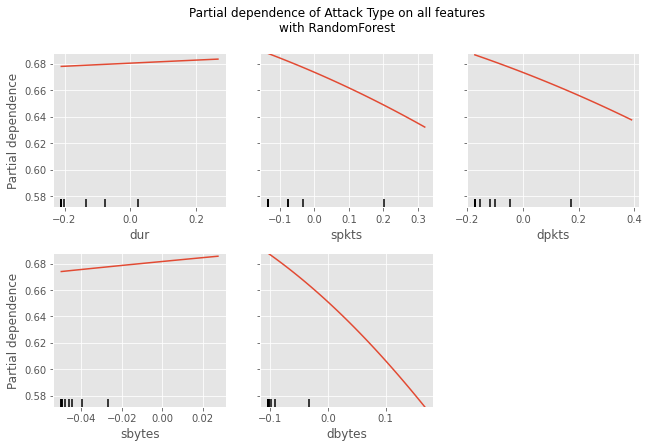

In [175]:
clf_name = models[2][0] # the classifier name
clf = models[2][1] # the classifier itself

features = [0,1,2,3,4]
plot_partial_dependence(estimator=clf, X=X_train_trans, 
                        features=features, feature_names=new_cols,
                        target=1)

fig = plt.gcf() # get current figure (gcf)
fig.suptitle("Partial dependence of Attack Type on all features\n"
              "with {}".format(clf_name))
fig.set_size_inches(10.5, 6.5)
fig.subplots_adjust(hspace=0.3)

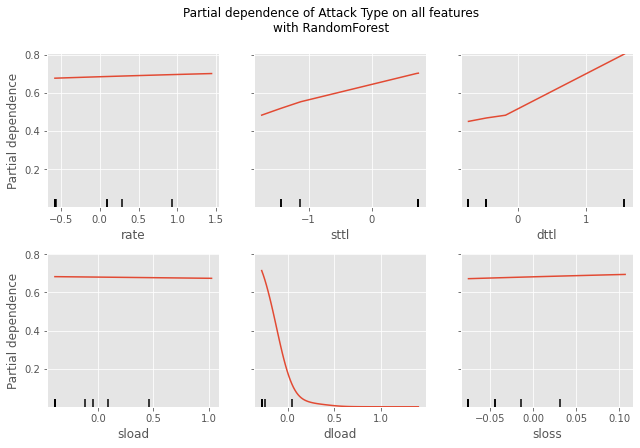

In [176]:
clf_name = models[2][0] # the classifier name
clf = models[2][1] # the classifier itself

features = [5,6,7,8,9,10]
plot_partial_dependence(estimator=clf, X=X_train_trans, 
                        features=features, feature_names=new_cols,
                        target=1)

fig = plt.gcf() # get current figure (gcf)
fig.suptitle("Partial dependence of Attack Type on all features\n"
              "with {}".format(clf_name))
fig.set_size_inches(10.5, 6.5)
fig.subplots_adjust(hspace=0.3)

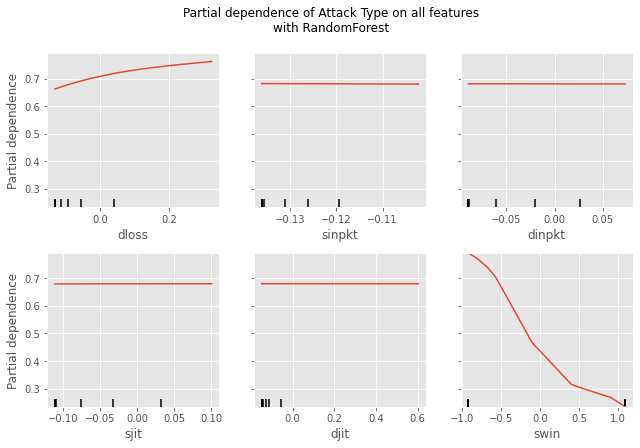

In [177]:
clf_name = models[2][0] # the classifier name
clf = models[2][1] # the classifier itself

features = [11,12,13,14,15,16]
plot_partial_dependence(estimator=clf, X=X_train_trans, 
                        features=features, feature_names=new_cols,
                        target=1)

fig = plt.gcf() # get current figure (gcf)
fig.suptitle("Partial dependence of Attack Type on all features\n"
              "with {}".format(clf_name))
fig.set_size_inches(10.5, 6.5)
fig.subplots_adjust(hspace=0.3)

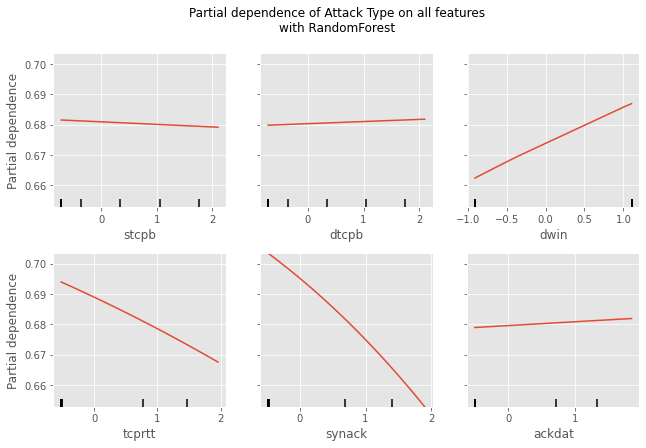

In [178]:
clf_name = models[2][0] # the classifier name
clf = models[2][1] # the classifier itself

features = [17,18,19,20,21,22]
plot_partial_dependence(estimator=clf, X=X_train_trans, 
                        features=features, feature_names=new_cols,
                        target=1)

fig = plt.gcf() # get current figure (gcf)
fig.suptitle("Partial dependence of Attack Type on all features\n"
              "with {}".format(clf_name))
fig.set_size_inches(10.5, 6.5)
fig.subplots_adjust(hspace=0.3)

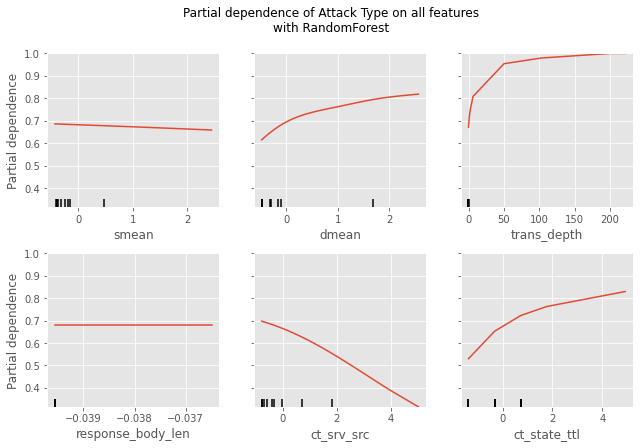

In [179]:
clf_name = models[2][0] # the classifier name
clf = models[2][1] # the classifier itself

features = [23,24,25,26,27,28]
plot_partial_dependence(estimator=clf, X=X_train_trans, 
                        features=features, feature_names=new_cols,
                        target=1)

fig = plt.gcf() # get current figure (gcf)
fig.suptitle("Partial dependence of Attack Type on all features\n"
              "with {}".format(clf_name))
fig.set_size_inches(10.5, 6.5)
fig.subplots_adjust(hspace=0.3)

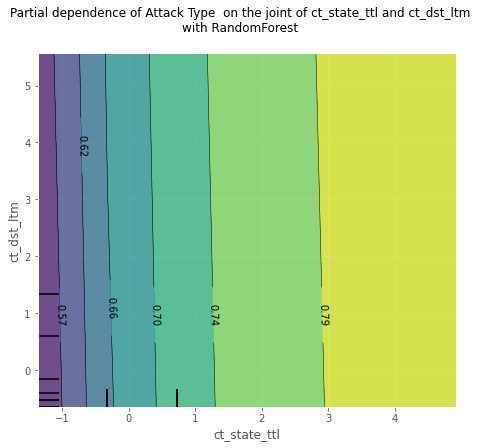

In [180]:
features = [(28, 29)]
plot_partial_dependence(estimator=models[2][1], X=X_train_trans, 
                        features=features, feature_names=new_cols,
                        target=1)

fig = plt.gcf() # get current figure (gcf)
fig.suptitle("Partial dependence of Attack Type  on the joint of ct_state_ttl and ct_dst_ltm\n"
              "with {}".format(clf_name))
fig.set_size_inches(7.5, 6.5)
fig.subplots_adjust(hspace=0.3)
#We can do whatever we want in this code, cause our data features are too many, here just show one instance.

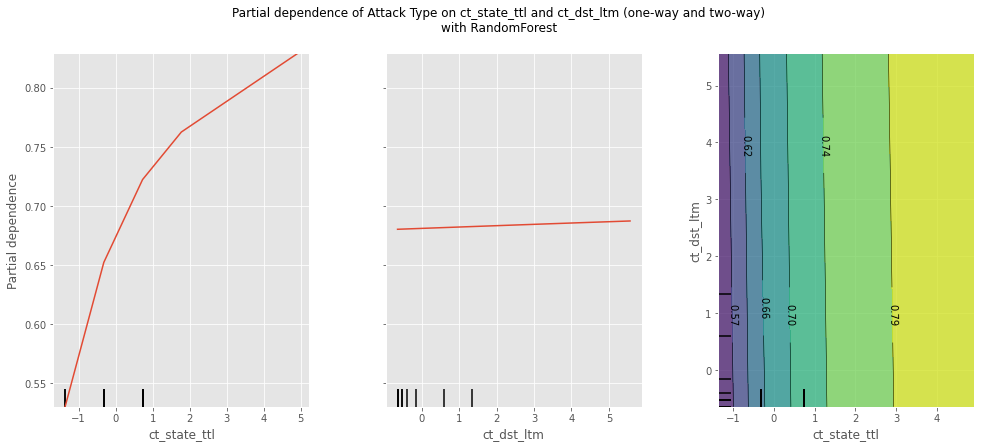

In [181]:
features = [28, 29, (28, 29)]
plot_partial_dependence(estimator=models[2][1], X=X_train_trans, 
                        features=features, feature_names=new_cols,
                        target=1)

fig = plt.gcf() # get current figure (gcf)
fig.suptitle("Partial dependence of Attack Type on ct_state_ttl and ct_dst_ltm (one-way and two-way)\n"
              "with {}".format(clf_name))
fig.set_size_inches(16.5, 6.5)
fig.subplots_adjust(wspace = 0.3, hspace=0.9)

Permutation Feature Importance
The next grpah gives the answer for the question "What features have the biggest impact on predictions". Feature Importance uses a unique approach.Feature Importance measures the decrease in model score when a single feature is randomly shuffled and the other features are kept constant, thus more the decrease in score(accuracy) more the impact of feature on the prediction. We import permutation_importance from sklearn to implement feature importance.

feature importance function has six important arguments to specify which features are plotted.

estimator: your fitted model/classifier.(model that we used was SVM) X: your training data y:Result Data scoring: what type of score you want to check against the feature n-repeats: number of times you want to shuffle the data random-state)

It returns the sample of datas like the feature_names, importance_means,importance_std, etc.

In [182]:
# import permutation function
from sklearn.inspection import permutation_importance

### Example: Permutation Feature Importance for Random Forest

#### Permutation Feature Importance on Training Data
Here we see, the feature interpretation for the training set. We can interpret these as follows that the top values are the most important features and those in bottom matter least and for the training dataset plots here, the features swin, dttl, dload have higher importance. Also, we can interpret that the removal of the most important feature, swin leaving the target and all other problems in place decreases the accuracy score of the prediction approximately by 24%

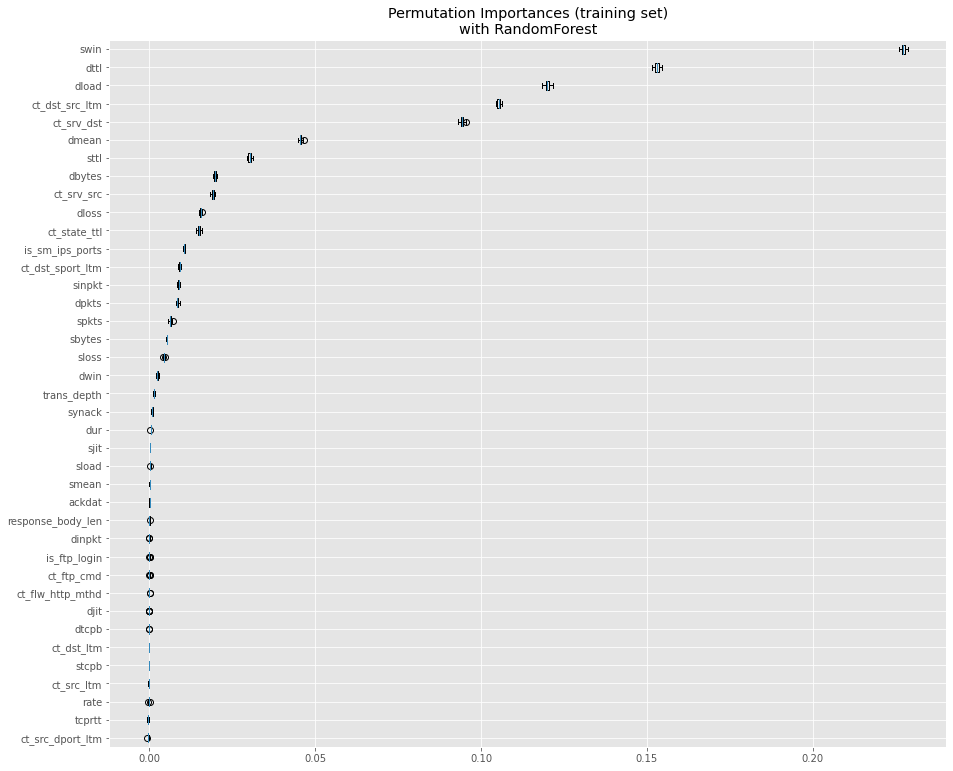

In [183]:
clf_name = models[2][0]
clf = models[2][1]
result = permutation_importance(estimator=clf, 
                                X=X_train_trans, 
                                y=y2_train_trans, 
                                scoring="accuracy",
                                n_repeats=50,
                                random_state=123)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()

ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=np.array(new_cols)[sorted_idx])
ax.set_title("Permutation Importances (training set)\n"
            "with {}".format(clf_name))

fig.set_size_inches(15, 13)
plt.show()

Here we have the Permutation feature importance, of the testing set, the result obtained are almost identical to training set , where swin is the most important feature, for making accurate predictions.

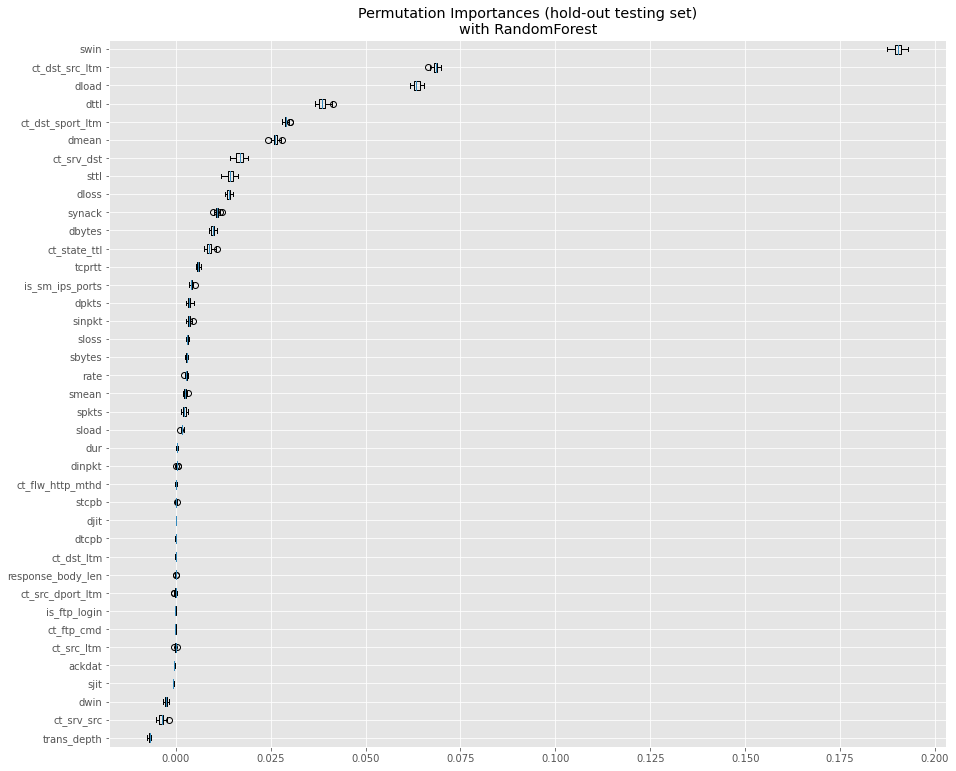

In [184]:
result = permutation_importance(estimator=clf, 
                                X=X_test_trans, 
                                y=y2_test_trans, 
                                scoring="accuracy",
                                n_repeats=50,
                                random_state=123)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()

ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=np.array(new_cols)[sorted_idx])
ax.set_title("Permutation Importances (hold-out testing set)\n"
            "with {}".format(clf_name))
fig.set_size_inches(15, 13)

plt.show()